In [16]:
%matplotlib inline

import collections

from shapely.geometry import box
from shapely.geometry import GeometryCollection
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import MultiPoint

import warnings

import geopandas as gpd

# Prepare the data

### 1st geometry no duplicates (line1)

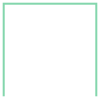

In [2]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 0.)]
line1 = LineString(coords)

line1

### 1st geometry ring (line1_ring)

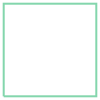

In [3]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 0.), (0., 0.)]
line1_ring = LineString(coords)

line1_ring

### 1st geometry 1 duplicate (line1_dupl)

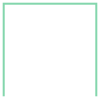

In [4]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 3.), (3., 0.)]
line1_dupl = LineString(coords)

line1_dupl

### 1st geometry ring 1 duplicate (line1_ring_dupl)

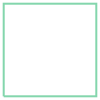

In [5]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 3.), (3., 0.), (0., 0.)]
line1_ring_dupl = LineString(coords)

line1_ring_dupl

### multi geometry no duplicates (mpoly)

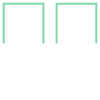

In [6]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 0.)]
coords2 = [(4., 0.), (4., 3.), (7., 3.), (7., 0.)]
mpoly = MultiLineString([coords, coords2])

mpoly

### multi geometry 1 duplicate (mpoly_1ldupl)

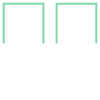

In [7]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 3.), (3., 0.)]
coords2 = [(4., 0.), (4., 3.), (7., 3.), (7., 0.)]
mpoly_lldupl = MultiLineString([coords, coords2])

mpoly_lldupl

### multi geometry 2 duplicates *1 each* (mpoly_1l1rdupl)

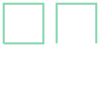

In [8]:
coords = [(0., 0.), (0., 3.), (3., 3.), (3., 3.), (3., 0.), (0., 0.)]
coords2 = [(4., 0.), (4., 3.), (7., 3.), (7., 3.), (7., 0.)]
mpoly_1l1rdupl = MultiLineString([coords, coords2])

mpoly_1l1rdupl

### multi geometry 4 duplicates *2 each* (mpoly_2l2rdupl)

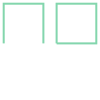

In [9]:
coords = [(0., 0.), (0., 3.), (0., 3.), (3., 3.), (3., 3.), (3., 0.)]
coords2 = [(4., 0.), (4., 3.), (4., 3.), (7., 3.), (7., 3.), (7., 0.), (4., 0.)]
mpoly_2l2rdupl = MultiLineString([coords, coords2])

mpoly_2l2rdupl

## Save the data

In [11]:
test_data = {"description":[
                "line1",
                "line1 ring",
                "line1 dupl",
                "line1 2dupl",
                "mpoly",
                "mpoly 1left dupl",
                "mpoly 1left 1right dupl",
                "mpoly 2left 2right dupl"],
             "geometry":[
                 line1,
                 line1_ring,
                 line1_dupl,
                 line1_ring_dupl,
                 mpoly,
                 mpoly_lldupl,
                 mpoly_1l1rdupl,
                 mpoly_2l2rdupl]
            }

In [12]:
gdf = gpd.GeoDataFrame(test_data)
gdf

,description,geometry
0,line1,"LINESTRING (0 0, 0 3, 3 3, 3 0)"
1,line1 ring,"LINESTRING (0 0, 0 3, 3 3, 3 0, 0 0)"
2,line1 dupl,"LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0)"
3,line1 2dupl,"LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0, 0 0)"
4,mpoly,"(LINESTRING (0 0, 0 3, 3 3, 3 0), LINESTRING (..."
5,mpoly 1left dupl,"(LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0), LINESTR..."
6,mpoly 1left 1right dupl,"(LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0, 0 0), LI..."
7,mpoly 2left 2right dupl,"(LINESTRING (0 0, 0 3, 0 3, 3 3, 3 3, 3 0), LI..."


In [13]:
gdf.to_file('../data/topology/linestring_duplicates_test_data.geojson', driver='GeoJSON')

## Read the data

In [14]:
gdf = gpd.read_file('../data/topology/linestring_duplicates_test_data.geojson')
gdf

,description,geometry
0,line1,"LINESTRING (0 0, 0 3, 3 3, 3 0)"
1,line1 ring,"LINESTRING (0 0, 0 3, 3 3, 3 0, 0 0)"
2,line1 dupl,"LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0)"
3,line1 2dupl,"LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0, 0 0)"
4,mpoly,"(LINESTRING (0 0, 0 3, 3 3, 3 0), LINESTRING (..."
5,mpoly 1left dupl,"(LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0), LINESTR..."
6,mpoly 1left 1right dupl,"(LINESTRING (0 0, 0 3, 3 3, 3 3, 3 0, 0 0), LI..."
7,mpoly 2left 2right dupl,"(LINESTRING (0 0, 0 3, 0 3, 3 3, 3 3, 3 0), LI..."


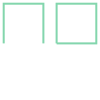

In [15]:
gdf.geometry[7]

## Expected geometries

In [22]:
expected_data = {"description":
             [
                "line1",
                "line1 ring",
                "line1 dupl",
                "line1 2dupl",
                "mpoly",
                "mpoly 1left dupl",
                "mpoly 1left 1right dupl",
                "mpoly 2left 2right dupl"
             ],
             "geometry":
             [
                 None,
                 MultiPoint([[0.,0.]]),
                 MultiPoint([[3.,3.]]),
                 MultiPoint([[0.,0.], [3.,3.]]),
                 None,
                 MultiPoint([[3.,3.]]),
                 MultiPoint([[0.,0.], [3.,3.], [7.,3.]]),
                 MultiPoint([[0.,0.], [3.,3.], [4.,0.], [4.,3.], [7.,3.]])
             ]
            }

In [24]:
expected_data_gdf = gpd.GeoDataFrame(expected_data)
expected_data_gdf

,description,geometry
0,line1,None
1,line1 ring,(POINT (0 0))
2,line1 dupl,(POINT (3 3))
3,line1 2dupl,"(POINT (0 0), POINT (3 3))"
4,mpoly,None
5,mpoly 1left dupl,(POINT (3 3))
6,mpoly 1left 1right dupl,"(POINT (0 0), POINT (3 3), POINT (7 3))"
7,mpoly 2left 2right dupl,"(POINT (0 0), POINT (3 3), POINT (4 0), POINT ..."


In [25]:
expected_data_gdf.to_file('../data/topology/linestring_duplicates_expected_data.geojson', driver='GeoJSON')

In [26]:
expected_data_gdf = gpd.read_file('../data/topology/linestring_duplicates_expected_data.geojson')
expected_data_gdf

,description,geometry
0,line1,None
1,line1 ring,(POINT (0 0))
2,line1 dupl,(POINT (3 3))
3,line1 2dupl,"(POINT (0 0), POINT (3 3))"
4,mpoly,None
5,mpoly 1left dupl,(POINT (3 3))
6,mpoly 1left 1right dupl,"(POINT (0 0), POINT (3 3), POINT (7 3))"
7,mpoly 2left 2right dupl,"(POINT (0 0), POINT (3 3), POINT (4 0), POINT ..."
